In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
ARF_base = pd.read_csv('/home/pkris25/May_2022/ARF+control_supertables.csv')

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (71,85,86,87,88,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ARF_base.columns

Index(['Unnamed: 0', 'temperature', 'daily_weight_kg', 'height_cm', 'sbp_line',
       'dbp_line', 'map_line', 'sbp_cuff', 'dbp_cuff', 'map_cuff',
       ...
       'SOFA_cardio', 'SOFA_cardio_mod', 'SOFA_resp', 'SOFA_resp_sa',
       'hourly_total_y', 'delta_24h_y', 'hourly_total_mod', 'delta_24h_mod',
       'csn', 'pat_id'],
      dtype='object', length=129)

In [5]:
ARF_red = ARF_base.drop(['Unnamed: 0',
 'temperature',
 'daily_weight_kg',
 'height_cm',
 'sbp_line',
 'dbp_line',
 'map_line',
 'sbp_cuff',
 'dbp_cuff',
 'map_cuff',
 'pulse',
 'unassisted_resp_rate',
 'spo2',
 'end_tidal_co2',
 'o2_flow_rate',
 'anion_gap',
 'base_excess',
 'bicarb_(hco3)',
 'blood_urea_nitrogen_(bun)',
 'calcium',
 'calcium_adjusted',
 'calcium_ionized',
 'chloride',
 'creatinine',
 'gfr',
 'glucose',
 'magnesium',
 'osmolarity',
 'phosphorus',
 'potassium',
 'sodium',
 'haptoglobin',
 'hematocrit',
 'hemoglobin',
 'met_hgb',
 'platelets',
 'white_blood_cell_count',
 'carboxy_hgb',
 'alanine_aminotransferase_(alt)',
 'albumin',
 'alkaline_phosphatase',
 'ammonia',
 'aspartate_aminotransferase_(ast)',
 'bilirubin_direct',
 'bilirubin_total',
 'fibrinogen',
 'inr',
 'lactate_dehydrogenase',
 'lactic_acid',
 'partial_prothrombin_time_(ptt)',
 'prealbumin',
 'protein',
 'prothrombin_time_(pt)',
 'thrombin_time',
 'transferrin',
 'amylase',
 'lipase',
 'b-type_natriuretic_peptide_(bnp)',
 'troponin',
 'fio2',
 'partial_pressure_of_carbon_dioxide_(paco2)',
 'partial_pressure_of_oxygen_(pao2)',
 'ph',
 'saturation_of_oxygen_(sao2)',
 'd_dimer',
 'hemoglobin_a1c',
 'parathyroid_level',
 'thyroid_stimulating_hormone_(tsh)',
 'crp_high_sens',
 'procalcitonin',
 'erythrocyte_sedimentation_rate_(esr)',
 'c_diff',
 'covid',
 'mtp',
 'gcs_eye_score',
 'gcs_verbal_score',
 'gcs_motor_score',
 'gcs_total_score',
 'vent_status',
 'norepinephrine',
 'epinephrine',
 'dobutamine',
 'dopamine',
 'phenylephrine',
 'vasopressin',
 'norepinephrine_dose_unit',
 'epinephrine_dose_unit',
 'dobutamine_dose_unit',
 'dopamine_dose_unit',
 'phenylephrine_dose_unit',
 'vasopressin_dose_unit',
 'icu',
 'imc',
 'ed',
 'procedure',
 'fluid_name',
 'fluid_formulary_name',
 'fluid_action_time',
 'fluid_start',
 'fluid_stop',
 'best_map',
 'norepinephrine_dose_weight',
 'epinephrine_dose_weight',
 'dobutamine_dose_weight',
 'dopamine_dose_weight',
 'phenylephrine_dose_weight',
 'vasopressin_dose_weight',
 'pf_sp',
 'pf_pa',
 'SIRS_resp',
 'SIRS_cardio',
 'SIRS_temp',
 'SIRS_wbc',
 'hourly_total_x',
 'delta_24h_x','hourly_total_y',
 'delta_24h_y',
 'hourly_total_mod',
 'SOFA_cardio_mod',
 'SOFA_resp_sa',
 'delta_24h_mod',
 'pat_id'], axis=1)

In [6]:
[column for column in ARF_red]

['SOFA_coag',
 'SOFA_renal',
 'SOFA_hep',
 'SOFA_neuro',
 'SOFA_cardio',
 'SOFA_resp',
 'csn']

In [18]:
ARF_red_no_NaN = ARF_red.fillna(0)

In [28]:
ARF_red_no_NaN.columns

Index(['SOFA_coag', 'SOFA_renal', 'SOFA_hep', 'SOFA_neuro', 'SOFA_cardio',
       'SOFA_resp', 'csn'],
      dtype='object')

In [29]:
ARF_red_no_NaN.groupby('csn').max()

,SOFA_coag,SOFA_renal,SOFA_hep,SOFA_neuro,SOFA_cardio,SOFA_resp
csn,,,,,,
175367279,2.0,1.0,1.0,3.0,1.0,2.0
257637061,2.0,0.0,0.0,3.0,1.0,2.0
572328084,0.0,3.0,0.0,0.0,0.0,3.0
595327321,2.0,2.0,0.0,4.0,4.0,3.0
628377267,1.0,0.0,0.0,4.0,4.0,2.0
...,...,...,...,...,...,...
57971118070,0.0,0.0,0.0,4.0,4.0,3.0
57987788072,2.0,4.0,0.0,1.0,4.0,0.0
58014138074,1.0,0.0,0.0,2.0,4.0,3.0


In [27]:
ARF_red_no_NaN.shape

(595166, 7)

In [21]:
ARF_final = ARF_red_no_NaN.groupby('csn').max()

In [30]:
ARF_final

,SOFA_coag,SOFA_renal,SOFA_hep,SOFA_neuro,SOFA_cardio,SOFA_resp
csn,,,,,,
175367279,2.0,1.0,1.0,3.0,1.0,2.0
257637061,2.0,0.0,0.0,3.0,1.0,2.0
572328084,0.0,3.0,0.0,0.0,0.0,3.0
595327321,2.0,2.0,0.0,4.0,4.0,3.0
628377267,1.0,0.0,0.0,4.0,4.0,2.0
...,...,...,...,...,...,...
57971118070,0.0,0.0,0.0,4.0,4.0,3.0
57987788072,2.0,4.0,0.0,1.0,4.0,0.0
58014138074,1.0,0.0,0.0,2.0,4.0,3.0


In [24]:
ARF_final.columns

Index(['SOFA_coag', 'SOFA_renal', 'SOFA_hep', 'SOFA_neuro', 'SOFA_cardio',
       'SOFA_resp'],
      dtype='object')

In [31]:
conditions = [
    (ARF_final['SOFA_cardio'] >= 2),
    (ARF_final['SOFA_coag'] >= 2),
    (ARF_final['SOFA_hep'] >= 2),
    (ARF_final['SOFA_neuro'] >= 2),
    (ARF_final['SOFA_renal'] >= 2),
    (ARF_final['SOFA_resp'] >= 2),
    (ARF_final['SOFA_cardio']<= 2) & (ARF_final['SOFA_coag']<= 2)& (ARF_final['SOFA_hep']<= 2) & (ARF_final['SOFA_neuro']<= 2) &  (ARF_final['SOFA_renal']<= 2) &  (ARF_final['SOFA_resp'] <= 2)]

values = ['Cardiovascular','Coagulation','Liver','Neuro','Renal','Respiratory', 'No Organ Failure']

ARF_final['MODS_indicator'] = np.select(conditions, values)

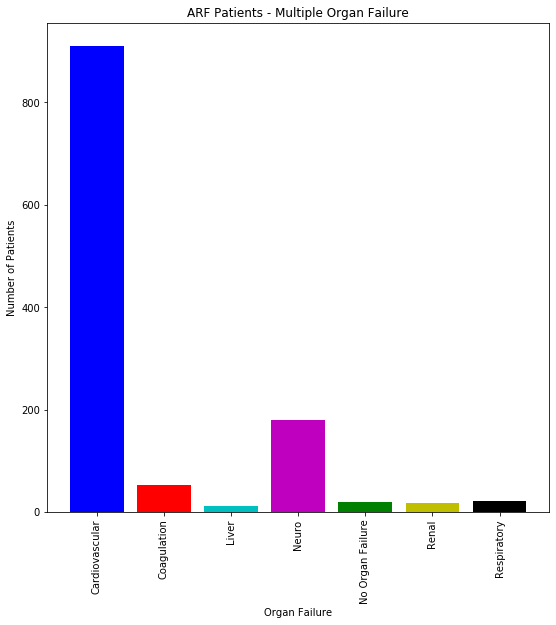

In [41]:
labels, counts = np.unique(ARF_final.MODS_indicator,return_counts=True)
import matplotlib.pyplot as plt 
my_colors = 'brcmgyk'
ticks = range(len(counts))
plt.bar(ticks,counts, align='center',color=my_colors)
plt.xticks(ticks, labels,rotation=90)
#Set descriptions:
plt.title("ARF Patients - Multiple Organ Failure")
plt.ylabel('Number of Patients')
plt.xlabel('Organ Failure')
plt.rcParams["figure.figsize"] = [10,10]
plt.savefig('SOFA_organs_final_3.pdf', dpi=300)

# for p in ax.ptches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()
#     ax.annotate(f'{height}',(x+width/2,y+heught*1.02),ha ='center')